# Effective Hamiltonian from perturbation theory

In [1]:
%pip install matplotlib numpy pairinteraction

import matplotlib.pyplot as plt
import numpy as np
import pairinteraction.real as pi
from pairinteraction import perturbative, ureg

/itp3/home/moegerle/Desktop/PairInteraction/perturbative/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
if pi.Database.get_global_database() is None:
    pi.Database.initialize_global_database(download_missing=True)

First we create our model space of interest, i.e. we define the single atom kets of interest as well as the pair kets (which we define as tuple of 2 singel atom kets).
Then we define for which interatomic distance vector we want to get the effective hamiltonian.
And finally we can use the high level functionality, provided by pairinteraction, to get the effective hamiltonian.

In [3]:
ket_atoms = {
    "up": pi.KetAtom("Rb", n=60, l=0, j=0.5, m=0.5),
    "down": pi.KetAtom("Rb", n=61, l=1, j=0.5, m=0.5),
}

ket_pairs = [
    (ket_atoms["up"], ket_atoms["down"]),
    (ket_atoms["down"], ket_atoms["up"]),
]

distance_list_mum = np.linspace(5, 20, 20)
eff_hamiltonians = []

eff_hamiltonian_0, eigvecs = perturbative.get_effective_hamiltonian(
    ket_pairs, ureg.Quantity([0, 0, 100], "micrometer"), perturbation_order=0, unit="MHz"
)

for d_mum in distance_list_mum:
    distance_vector = ureg.Quantity([0, 0, d_mum], "micrometer")
    eff_hamiltonian, eigvecs = perturbative.get_effective_hamiltonian(
        ket_pairs, distance_vector, unit="MHz"
    )
    eff_hamiltonians.append(eff_hamiltonian - eff_hamiltonian_0)

eff_hamiltonians = np.array(eff_hamiltonians)

/itp3/home/moegerle/Desktop/PairInteraction/perturbative/src/pairinteraction/perturbative/effective_hamiltonian.py:238: RuntimeWarning: divide by zero encountered in divide
  delta_e_em = 1 / (h0_m[np.newaxis, :] - h0_e[:, np.newaxis])


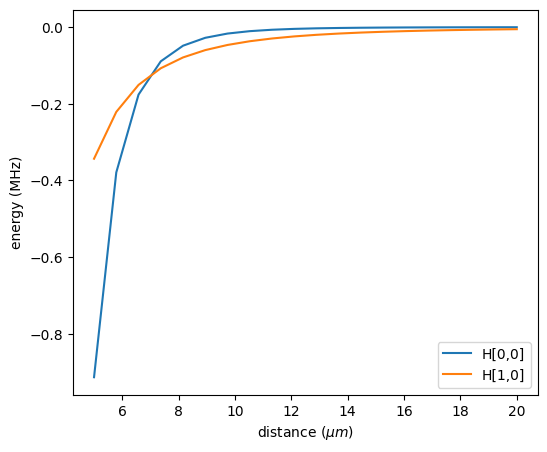

In [4]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(distance_list_mum, eff_hamiltonians[:, 0, 0], label=r"H[0,0]")
ax.plot(distance_list_mum, eff_hamiltonians[:, 1, 0], label=r"H[1,0]")
ax.legend()

ax.set_xlabel(r"distance $(\mu m)$")
ax.set_ylabel(r"energy (MHz)")

plt.show()